<a href="https://colab.research.google.com/github/LiShun522/MNIST_homework/blob/main/Colab%E5%AF%A6%E4%BD%9C%EF%BC%9A%E4%BD%BF%E7%94%A8_CNN_%E5%BB%BA%E7%AB%8BMNIST%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E5%9C%96%E7%89%87%E8%BE%A8%E8%AD%98%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3004/logos/header.png"
  />
  <center>MNIST 手寫數字資料庫</center>
  <center>圖片來源: https://www.kaggle.com/</center>
</p>

## 1: 切換 TensorFlow 版本至 2.x

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## 2: 載入套件及資料集

In [2]:
%matplotlib inline
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, BoundedIntText

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 3: 資料前處理 (Data Preprocessing)

讀取 MNIST 手寫數字資料集

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


由於 CNN 的輸入必須帶有通道數/圖層這個維度，所以我們必須將圖片大小由 $28\times 28$ 轉換成 $28\times 28\times 1$。

In [4]:
# Reshape size of each image from (28, 28) to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# Normalize data range
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [6]:
# One hot encoding image labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 4: 建立你的第一個卷積神經網路 (Convolutional Neural Network)

在這個部分，我們將逐步帶領大家建立經典的 CNN 模型 LeNet-5 的變形。

LeNet-5 分成兩個部分，分別為卷積層與全連接層，兩部份之間是透過扁平層 (Flatten) ，將卷積層最後輸出的 2 維向量壓扁成 1 維向量。

In [7]:
model = Sequential()

### [卷積層]

#### 第一層卷積層
- Filter 個數: 6
- Kernal 尺寸: (3, 3)
- 激活函數: relu
- 神經網路的輸入格式: (28, 28, 1)

In [8]:
model.add(Conv2D(6, (3, 3), input_shape=(28, 28, 1), activation='relu')) # no padding

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 最大池化層
* 池化視窗: 2x2 (預設)

In [9]:
model.add(MaxPool2D()) # pool_size=(2, 2)

在接到第二層卷積層以及池化層前，我們偷偷看一下模型目前的長相。

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60 (240.00 B)

 Trainable params: 60 (240.00 B)

 Non-trainable params: 0 (0.00 B)

#### 第二層卷積層 (含池化層)
- Filter 個數: 16
- Kernal 尺寸: (3, 3)
- 激活函數: ReLU
- 最大池化層之池化視窗: 2x2

In [11]:
model.add(Conv2D(16, (3, 3), activation='relu'))  # no padding
model.add(MaxPool2D()) # pool_size=(2, 2)

#### 加入扁平層 (Flatten layer) 以接上全連接層

In [12]:
model.add(Flatten())

在接到全連接神經網路層前，我們稍微看一下模型目前的長相。

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 940 (3.67 KB)

 Trainable params: 940 (3.67 KB)

 Non-trainable params: 0 (0.00 B)

### [全連接層]

#### 第一層全連接層
- 神經元個數: 120
- 激活函數: ReLU

In [14]:
model.add(Dense(units=120, activation='relu'))

#### 第二層全連接層
- 神經元個數: 84
- 激活函數: ReLU










In [15]:
model.add(Dense(units=84, activation='relu'))

#### 輸出層
- 神經元個數: 10
- 激活函數: softmax


In [16]:
model.add(Dense(units=10, activation='softmax'))

### 編譯模型: 設定模型訓練時的設定

- Optimizer: Stochastic Gradient Descent (SGD)
- Loss: categorical cross-entropy

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['categorical_accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,074 (234.66 KB)

 Trainable params: 60,074 (234.66 KB)

 Non-trainable params: 0 (0.00 B)

### 訓練模型: 透過訓練模型來學習分類資料的函數

In [19]:
training_history = model.fit(X_train, y_train,
                             batch_size=32,
                             epochs=5,
                             validation_data=(X_test, y_test)
                             )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - categorical_accuracy: 0.7030 - loss: 0.9549 - val_categorical_accuracy: 0.9429 - val_loss: 0.1786
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.9535 - loss: 0.1507 - val_categorical_accuracy: 0.9713 - val_loss: 0.0930
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9661 - loss: 0.1074 - val_categorical_accuracy: 0.9770 - val_loss: 0.0778
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9749 - loss: 0.0812 - val_categorical_accuracy: 0.9792 - val_loss: 0.0646
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9776 - loss: 0.0719 - val_categorical_accuracy: 0.9822 - val_loss: 0.0559


<font color=Red size=5>非常驚人的結果！</font>

在同樣的訓練設定下，訓練權重較少的 CNN 模型在預測正確率上可以輕易超越 DNN 的結果，這也是為何 CNN 被視為在圖片分類上的一大利器！

### 訓練過程的評估

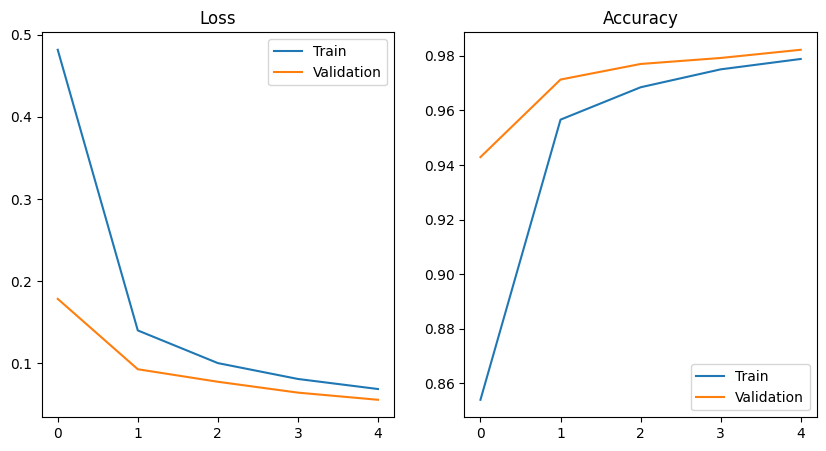

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

In [21]:
# prediction result on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("測試資料 loss: %f" %test_loss)
print("測試資料準確率: %f" %test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9779 - loss: 0.0693
測試資料 loss: 0.055863
測試資料準確率: 0.982200


## 5: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [22]:
def visulization(idx=0):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx]
    sample_y = y_test[idx]
    # Predict the class of random data
    predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # Plot raw image
    ax1.imshow(sample_x[:, :, 0], 'gray_r')
    ax1.set_title("Image Label: %d" %sample_y.argmax())

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title("Prediction Result: %d" %predict_label);
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
    else:
        print("預測失敗QQ")

In [23]:
interact(visulization, idx=BoundedIntText(value=5566, min=0, max=X_test.shape[0]-1));

interactive(children=(BoundedIntText(value=5566, description='idx', max=9999), Output()), _dom_classes=('widge…